## Идея рекуррентных нейронных сетей
Архитектура RNN специально сделана для работы с последовательными данными. В последовательных данных важно:

- Учитывать, что последовательности могут быть разной длины.
- Следить за порядком элементов в последовательности. Ведь «мальчик укусил собаку» и «собака укусила мальчика» — совершенно разные по смыслу предложения, несмотря на одинаковый набор слов.

RNN как раз учитывает все эти нюансы.

**RNN (Recurrent Neural Network)** — это архитектура, которая обрабатывает данные по одному элементу за раз, при этом запоминая то, что уже видела ранее. Она как бы шагает по последовательности и строит внутреннее представление, учитывающее весь контекст.

Давайте разберём, как работает RNN, на следующем примере:

"мальчик переходил дорогу и увидел собаку" 

RNN будет обрабатывать такую последовательность токен за токеном, при этом сохраняя и дополняя скрытое состояние при чтении новых токенов. Таким образом:

1. На момент обработки токена «мальчик» сеть сохранит полезную информацию об этом токене.
2. На момент обработки токена «переходил» сеть дополнит свои знания информацией о токене «переходил», при этом уже зная, что речь идёт о мальчике.
3. И так далее.

Вспомним наиболее популярные классические методы для текстов:

- Bag of Words: для каждого токена считается его количество в тексте, результат записывается в таблицу. Ширина таблицы — размер словаря.
    
- Tf-idf: помимо частоты встречаемости токена в конкретном тексте, учитывается и количество текстов в тренировочном датасете, в которых встречается токен. Такие фичи подсчитываются для каждого текста и для каждого токена и записываются в таблицу.

В этих подходах последовательные данные по сути преобразуются в табличные. Такие методы действительно извлекают полезную информацию из текстов, как набор токенов в тексте и их используемость, но теряют всю суть последовательных данных — порядок токенов.

Архитектура RNN учитывает порядок токенов и, как результат, часто обходит по качеству классические методы работы с текстами. А некоторые задачи и вовсе невозможно решить классическими методами. Например, перевод текста с одного языка на другой — просто невозможно сделать перевод, не учитывая порядок токенов.

# Архитектура стандартной RNN

Так как нейросети оперируют векторами, применяя к ним линейные и нелинейные операции, то и информация, извлечённая из текста, запоминается в вектор. Этот вектор — просто последовательность чисел, которая обновляется при последовательной обработке токенов друг за другом.

На каждом временном шаге t модель получает:

- Вход $x_t$​ — токен под порядковым номером $t$ в последовательности;
    
- Предыдущее скрытое состояние $h_{t−1}$​ — информацию, которая нейросеть запомнила, обработав предыдущие токены.

И считает:

- Скрытое состояние $h_t$​ — добавляет информацию о новом токене.
    
- Выход $y_t$​ — выход для токена затем используется для решения разных задач.

Формулы расчёта выходов и скрытых состояний:
$$
h_t​=tanh(W_{hx}​x_t​+W_{hh}​h_{t−1}​+b_h​)
$$
$$
y_t​=W_{hy​}h_t​+b_y​
$$
Здесь:

- $W_{hx}​,W_{hh}​,W_{hy}​$ — матрицы весов. Так, $W_{hx}​x_t​$ имеет размер (hidden_size,1)， $W_{h​h}h_{t−1}$​ имеет размер (hidden_size,1), и их сумма тоже имеет размер (hidden_size,1). Это матрицы весов, которые определяют, как сильно влияют входные данные и предыдущее состояние сети на текущее состояние.

- $W_{hx}$ - матрица весов между входными данными $x^{(t)}$ и скрытым слоем $h$.

- $W_{hh}$ - матрица весов, связанная с рекуретным ребром.

- $W_{hy}$ - матрица весов между скрытым слоем и выходным слоем.

- $b_h​,b_y$​ — смещения, где $b_h$​ — вектор размера (hidden_size,1)， $b_y$​ — вектор размера (output_size,1).

- $tan h$ — нелинейная функция активации, сжимающая значения в диапазон (−1,1).

- вектор $h_t$​ размера (hidden_size,1)， — это и есть скрытое состояние. В нём запоминается основная информация о тексте. Это состояние сети в текущий момент времени $t$, то есть результат обработки данных на текущем шаге.

- вектор $y_t​$ размера (output_size,1) — выход RNN для токена $x_t$​. Например, очередное слово в предложении.

Каждое новое состояние зависит от предыдущего, поэтому RNN имеет память о прошлом.

По сути, формула говорит: «Чтобы получить текущее состояние сети, нужно взять входные данные, умножить их на соответствующие веса, добавить предыдущее состояние сети, умножить на другие веса, прибавить смещение и пропустить всё через функцию активации».

Пример: представьте, что RNN — это человек, который читает книгу. $x_t$ — это каждое слово, которое он читает. $h_t$ — его понимание текста на данный момент. Предыдущее состояние $h_{t-1}$ — это то, что он уже понял из предыдущих слов. Веса $W_{hx}$ и $W_{hh}$ определяют, насколько сильно каждое слово и предыдущее понимание влияют на текущее понимание текста.

Вот как визуально выглядит рекуррентная сеть:

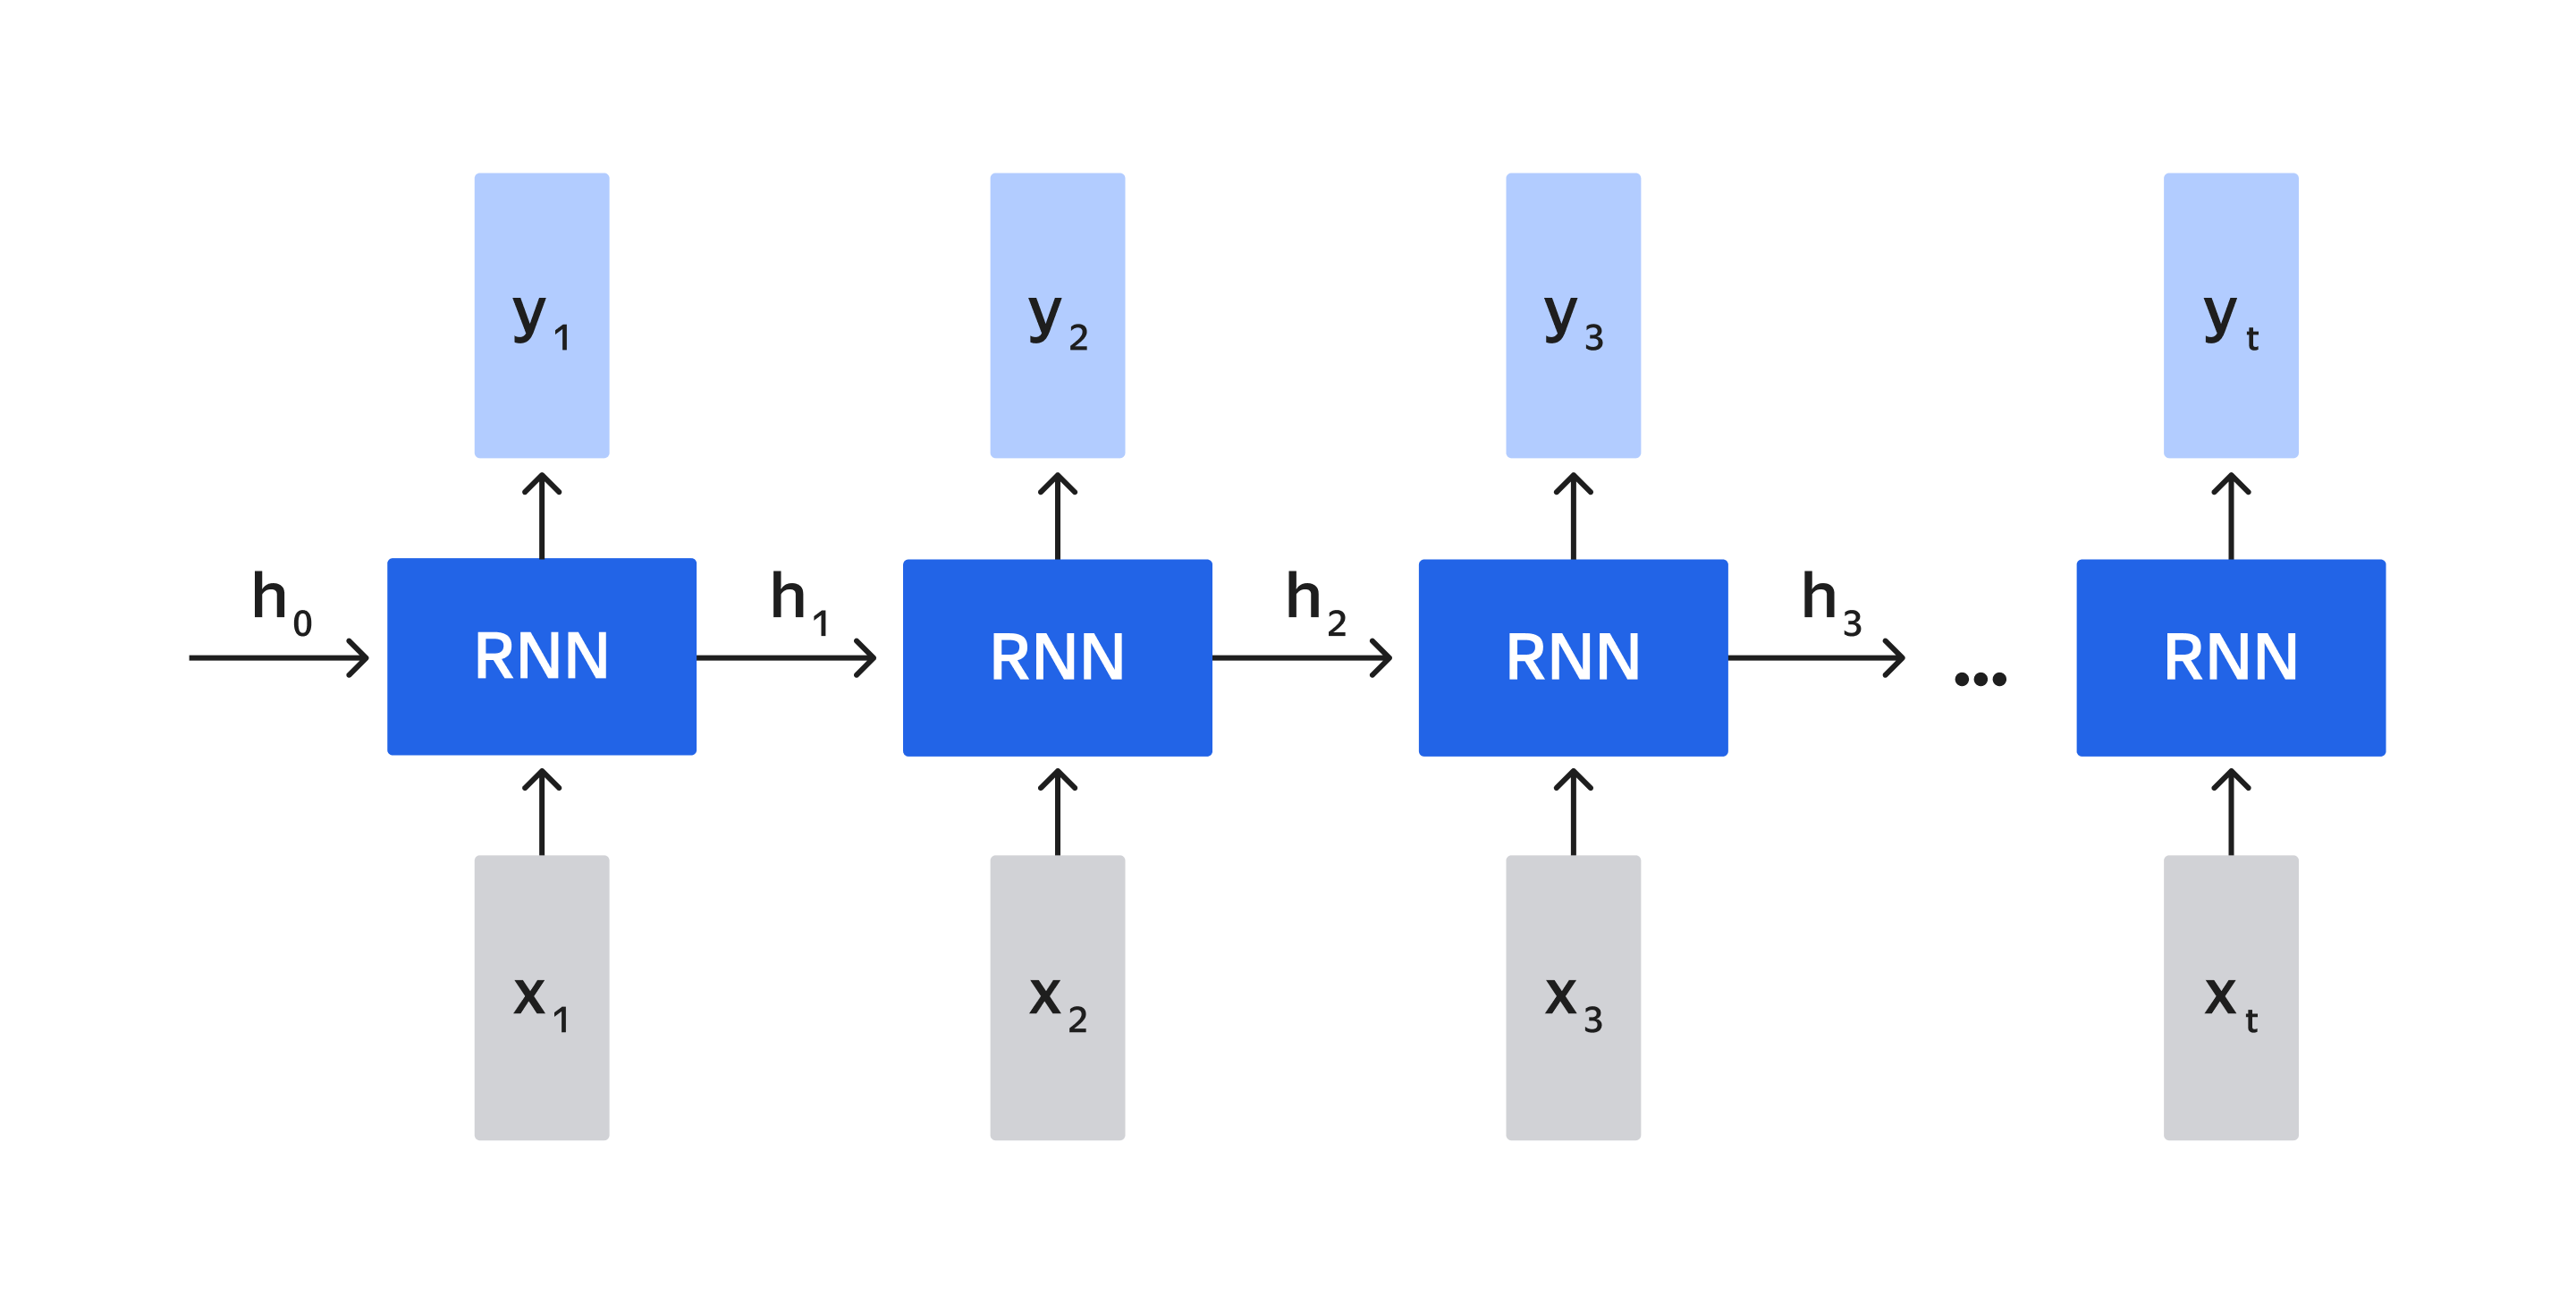

In [1]:
from IPython.display import Image
from ml_dl_experiments import settings

Image(settings.SOURCE_PATH+"ml_dl/RNN/Image.png", width=600, height=1000)

```
x1 → [RNN] → h1 → y1

x2, h1 → [RNN] → h2 → y2

x3, h2 → [RNN] → h3 → y3
...
```

Узел RNN на каждом шаге — это одна и та же нейросеть с одними и теми же весами, но работающая на разных входах и с разными состояниями.

Скрытые узлы обычно инициализируются нулями или небольшими случайными значениями

## Как использовать RNN при решении задач

RNN можно использовать практически для всех стандартных задач машинного обучения. После forward-прохода на последовательности токенов $x_1​,x_2​,..,x_n​,$ на выходе получается:

- Последовательность выходов $y_1​,y_2​,..,y_n$​. Каждый из этих выходов $y_i$​ посчитан по соответствующему скрытому состоянию $h_i$​, полученному на момент обработки токена $x_i$​.

- Скрытое состояние $h_n$​ — информация, которую запомнила нейросеть, прочитав все токены.

Этих векторов и простых операций над ними достаточно, чтобы решать большинство задач.

## Классификация текста

Например, предсказать сентимент текста — негативный или позитивный.

Если нужно предсказать один из $k$ классов, то можно использовать скрытое состояние $h_n$​, полученное после прохождения по всей последовательности. Одной линейной операции можно получить вектор размера $(k,1)$, после применения к которому softmax получится распределение вероятностей на $k$ классах:

class_probabilities=$softmax(W_{kh}​h_n​),$

predicted_class=$argmax$(class_probabilities).

## Регрессия

Например, дать оценку правдоподобности текста по шкале от 1 до 100.

Здесь идея такая же, как в классификации, но достаточно предсказать всего лишь одно вещественное число, поэтому размер матрицы в финальном линейном слое — (hidden_size,1) вместо (hidden_size,k)

predicted_value=$W_{1h}​h_n$​.

## Классификация токенов

Например, для каждого токена в тексте предсказать, является ли он именем человека или просто случайное слово. Такая задача называется named entity recognition — NER.

Идея в том, чтобы посчитать распределение по k классам для каждого токена в последовательности. После forward-прохода для токенов уже есть набор выходов $(y_1​,y_2​,..,y_n​)$. К каждому такому выходу можно применить линейную операцию и получить распределение вероятностей по k классам, которые хочется предсказывать:

class_probabilities​=$softmax(W_{ky}​⋅y_i​)$

predicted_class=argmax(class_probabilities_i​)

## Кластеризация

Например, разделить тексты по смыслу на 5 категорий.

Здесь используется интересный трюк: каждое скрытое состояние, полученное для текстов из датасета, — это вектор фиксированной длины. А значит, по датасету из $n$ текстов можно получить таблицу размера $(n,hidden$_$size)$ и работать с ней как с табличными данными. Поверх полученных скрытых состояний можно использовать классические методы кластеризации (например, K-means, DBSCAN) и многие другие.

## Генерация текста

RNN подходят даже для генерации текста. Полученное скрытое состояние можно использовать для предсказания следующего слова. Задачу предсказания следующего слова можно свести к задаче классификации на vocab_size (размер словаря) классов.

Тогда следующее $n+1$-е слово можно предсказать так:

word_probabilities_{n+1}​=$softmax(W_{kh}​h_n​)$

$word_{n+1}$​=argmax(word_probabilities_{n+1}​)

А затем можно повторять предсказание следующего слова снова и снова, тем самым генерируя текст:

$h_{n+1}​=RNN(word_{n+1}​),$

word_probabilities_{n+2}​=$softmax(W_{kh}​h_{n+1}​)$

$word_{n+2}$​=argmax(word_probabilities_{n+2}​)

Как видите, подсчёт скрытых состояний и выходов для каждого токена можно использовать при решении множества самых разных задач — и возможностей здесь гораздо больше, чем у классических методов работы с текстами. 

Эта идея работы с промежуточными выходами нейросети для решения самых разных типов задач — одна из ключевых в глубоком обучении. И будет встречаться не только в теме с RNN, но и во множестве других архитектур.

# Обучение RNN

## Как работает обучение RNN

Обучение рекуррентных нейронных сетей не отличается от обучения остальных архитектур. На больших датасетах обычно используется классический стохастический градиентный спуск:

1. В зависимости от решаемой задачи определяется функция потерь.

2. Данные подаются на вход батчами.
    
3. Для каждого батча при forward-проходе считаются и сохраняются выходы слоёв, при backward-проходе с помощью этих выходов считаются градиенты.
    
4. Веса обновляются в сторону антиградиента, выходы слоёв обнуляются, происходит переход к следующему батчу и пункту 2.

Но есть некоторые нюансы, связанные с расчётом градиентов. С ходу не так очевидно, как считать производные для рекуррентной архитектуры. Нейросеть не разом обрабатывает каждый элемент в батче, а делает это пошагово — проходится по последовательности и шаг за шагом считает скрытые состояния и выходы для каждого нового токена.

Разберёмся в деталях подсчёта градиентов и обновления весов.

**1. Прямой проход**

На каждом временном шаге входной последовательности $x_t$​ модель вычисляет скрытое состояние $h_t$​:
$$
h_t​=tanh(W_{hx}​x_t​+W_{hh​}h_{t−1}​+b_h​)
$$
И делает предсказание:
$$
y_t​=W_{yh}​h_t​+b_y​.
$$
Каждое состояние $h_t$​ зависит от предыдущего состояния $h_{t−1​}$ и текущего входа $x_t$​. Это позволяет модели учитывать порядок и контекст.

**2. Обратное распространение ошибки**

После завершения прямого прохода модель рассчитывает ошибку (например, CrossEntropyLoss). Затем эта ошибка передаётся обратно во времени, начиная с последнего шага:

 - Градиент ошибки передаётся от $y_T$​ к $h_T$​ через $W_{hy}$​ (T здесь — длина последовательности).

 - От $h_T$​ к $h_{T−1}$​ через $W_{hh}$​ и далее.

Производная $∂h_t​/∂h_{t−1}$​ включает $W_{hh}$​ и производную функции $tan_h$:
$$
\frac{∂h_t}{∂h_{t-1}}​​=(1−h_t^2​)⋅W_{hh}^T​.
$$

Последовательность рекуррентных операций можно завернуть в одну длинную формулу и думать о ней как о многослойной нейросети, где количество слоёв линейно зависит от длины последовательности:

$$
h_T​=RNN(x_T​,h_{T−1}​)=RNN(x_T​,RNN(x_{T−1}​,h_{T−2}​))=RNN(x_T​,RNN(x_{T−1}​,RNN(x_{T−2}​,h_{T−3}​)))=...
$$
Когда есть одна длинная формула со множеством параметров, для неё работает такая же логика расчёта производной сложной функции, как это происходит и в других архитектурах.

Такой подсчёт градиентов в рекуррентных нейронных сетях принято называть обратным распространением ошибки во времени (Backpropagation Through Time, BPTT).

# Как использовать RNN в PyTorch

Перейдём к практической реализации. Рассмотрим, как использовать классическую рекуррентную нейронную сеть в PyTorch и как технически извлекать выходы и скрытые состояния.

## Слой RNN

В PyTorch базовый слой RNN создаётся очень просто:

```py
import torch

import torch.nn as nn


input_size = 10  # размерность входного вектора
hidden_size = 20  # размерность скрытого состояния
num_layers = 2   # количество рекуррентных слоёв


rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True) 
```

Параметры слоя RNN:

- input_size: размерность входного признака (количество признаков на вход);
- hidden_size: размер скрытого состояния;
- num_layers: количество рекуррентных слоёв (стек слоёв);
- batch_first=True: указывает, что размерность батча идёт первой.

## Прямой проход

Давайте рассмотрим пример с тремя входными последовательностями разной длины, но уже выровненными до одинаковой длины с помощью пэддинга:

```py
import torch

import torch.nn as nn


input_size = 3  # размерность входного вектора
hidden_size = 5  # размерность скрытого состояния
num_layers = 2   # количество рекуррентных слоёв


rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)


batch_size = 2

seq_length = 3  # количество шагов в последовательности


# Создадим случайный входной тензор (батч из 3 последовательностей по 5 токена)
x = torch.randn(batch_size, seq_length, input_size)


# Инициализация скрытого состояния (num_layers, batch_size, hidden_size)
h0 = torch.zeros(num_layers, batch_size, hidden_size)


# Прямой проход
output, hn = rnn(x, h0)


# вывод результатов
print("Выходной тензор (output):", output.shape)
print(output)


print("Последнее скрытое состояние (hn):", hn.shape)
print(hn) 
```
После выполнения прямого прохода мы получаем два тензора:

- output: выходы RNN на каждом шаге последовательности. Размерность: (batch_size, seq_length, hidden_size).

- hn: последнее скрытое состояние для каждого слоя RNN. Размерность: (num_layers, batch_size, hidden_size).

Результатом выполнения кода будет:

```py
Выходной тензор (output): torch.Size([2, 3, 5])
tensor([[[-0.5659, -0.7087, -0.8099, -0.4756,  0.0528],
         [-0.6957, -0.3260, -0.8181, -0.6232,  0.2488],
         [-0.7966, -0.3836, -0.6511, -0.4114,  0.1058]],


        [[-0.5776, -0.3341, -0.7347, -0.3609,  0.1157],
         [-0.5656, -0.1653, -0.7116, -0.3518,  0.4593],
         [-0.7753, -0.1764, -0.4376, -0.0219,  0.2678]]],
       grad_fn=<TransposeBackward1>)


Последнее скрытое состояние (hn): torch.Size([2, 2, 5])
tensor([[[ 0.9337,  0.4064, -0.0882,  0.7604, -0.8113],
         [ 0.6930,  0.0529,  0.1860,  0.6814, -0.6653]],


        [[-0.7966, -0.3836, -0.6511, -0.4114,  0.1058],
         [-0.7753, -0.1764, -0.4376, -0.0219,  0.2678]]],
       grad_fn=<StackBackward0>) 
```
На выходе получаются просто тензоры из вещественных чисел, которые хранят в себе полезную информацию, извлечённую из входной последовательности.

## Стек слоёв RNN

В примере выше может возникнуть вопрос о параметре num_layers. Когда мы устанавливаем num_layers > 1, это означает, что мы используем несколько слоёв RNN, которые стекаются друг на друга. Выходы первого слоя становятся входами для второго и так далее. Это позволяет нейросети извлекать более глубокие зависимости в последовательностях.

Здесь изображена RNN, которая посимвольно обрабатывает входную последовательность и имеет два рекуррентных слоя: скрытое состояние из первого используется как вектор входной последовательности для второго.

Таким образом, можно легко строить глубокие рекуррентные модели, используя всего несколько строчек кода.

## Эмбеддинг-слой

Токенизированные тексты приходят на вход нейронной сети как последовательности чисел, а рекуррентный слой принимает на вход вектор, поэтому нужен промежуточный этап, где каждому токену сопоставляется вектор заданной заранее размерности. 

Это реализуется с помощью эмбеддинг-слоя. В PyTorch для этого есть специальный класс nn.Embedding. Его параметры — размерность выходного вектора и размерность словаря, чтобы знать, какому количеству токенов нужно сопоставлять векторы.

Использовать эмбеддинг-слой можно так:

```py
# создаём эмбеддинг-слой
emb_layer = nn.Embedding(vocab_size, embedding_dim)
# создаём RNN-слой
rnn = nn.RNN(embedding_dim, hidden_size, batch_first=True)
# считаем эмбеддинг-слой
emb_layer_res = emb_layer(input_sequence)
# считаем RNN-слой
rnn_layer_res = rnn(emb_layer_res) 
```
Здесь:

- vocab_size — размер словаря. Все токены имеют значения в диапазоне от 0 до boca.

- embedding_dim — размер вектора эмбеддинг-слоя и, соответственно, размер входного вектора для RNN.

- input_sequence — входная последовательность токенов.

## Пэддинг и маскинг

Когда последовательности в батче имеют разную длину, мы используем пэддинг и маскинг, чтобы привести их к единой длине и дать нейросети понять, где пэддинг-токены, а где настоящие.

Но для рекуррентных сетей вручную считать маски не нужно. В PyTorch уже реализована функция pack_padded_sequence, которая принимает на вход тексты после пэддинга и их длины и возвращает объект типа PackedSequence. 

Этот объект можно передать на вход нейросети при forward-проходе:

```py
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence


# Предположим, что длины последовательностей известны:
lengths = torch.tensor([5, 3, 2])


# Упаковываем последовательности перед подачей в RNN

packed_x = pack_padded_sequence(x, lengths, batch_first=True, enforce_sorted=False)


# Прямой проход с упакованными последовательностями
packed_output, hn = rnn(packed_x, h0)


# Распаковываем обратно выходы
output, output_lengths = pad_packed_sequence(packed_output, batch_first=True) 
```

In [2]:
import torch

import torch.nn as nn


input_size = 3  # размерность входного вектора
hidden_size = 5  # размерность скрытого состояния
num_layers = 2   # количество рекуррентных слоёв

batch_size = 2
seq_length = 3  # количество токенов (шагов) в последовательности


# Создадим случайный входной тензор (батч из 3 последовательностей по 3 токена)
x = torch.randn(batch_size, seq_length, input_size)


# Инициализация скрытого состояния (num_layers, batch_size, hidden_size)
h0 = torch.zeros(num_layers, batch_size, hidden_size)

print(x)
print(h0)

tensor([[[ 0.1657,  2.1868,  0.0744],
         [ 0.0664, -0.1160, -1.2484],
         [ 0.3611, -1.4497, -0.2255]],

        [[-0.6151,  1.1988, -1.1645],
         [ 0.3847,  0.4834,  1.0306],
         [-1.3269,  1.8048, -0.6586]]])
tensor([[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]])


Давайте разберём ваш тензор **по слоям**, как луковицу — и вы сразу всё увидите.

Вот наш тензор `x`:

```python
tensor([[[ 0.1657,  2.1868,  0.0744],
         [ 0.0664, -0.1160, -1.2484],
         [ 0.3611, -1.4497, -0.2255]],

        [[-0.6151,  1.1988, -1.1645],
         [ 0.3847,  0.4834,  1.0306],
         [-1.3269,  1.8048, -0.6586]]])
```

Его форма: **`(2, 3, 3)`**  
Потому что:
- 2 «больших» блока → `batch_size = 2`
- В каждом блоке — 3 строки → `seq_length = 3`
- Каждая строка — 3 числа → `input_size = 3`

---

### 🔍 Теперь по частям:

#### 1. **Батч (batch)** — это **весь тензор целиком**, состоящий из **нескольких независимых примеров**.

- У вас **2 примера** (2 «предложения», 2 временных ряда и т.п.).
- Они обрабатываются **параллельно**, но **независимо**: скрытое состояние не переносится между ними.

> ✅ **Батч = 2 последовательности.**

---

#### 2. **Последовательность (sequence)** — это **один пример из батча**, то есть **один «блок»**.

У вас их два:

- **Последовательность 0** (первый пример):
  ```python
  [[ 0.1657,  2.1868,  0.0744],
   [ 0.0664, -0.1160, -1.2484],
   [ 0.3611, -1.4497, -0.2255]]
  ```

- **Последовательность 1** (второй пример):
  ```python
  [[-0.6151,  1.1988, -1.1645],
   [ 0.3847,  0.4834,  1.0306],
   [-1.3269,  1.8048, -0.6586]]
  ```

> ✅ **Каждая последовательность — это один элемент батча.**  
> ❌ **Батч ≠ последовательность.** Батч — это **набор** последовательностей.

---

#### 3. **Токен (token)** — это **один временной шаг** в последовательности, то есть **одна строка** внутри последовательности.

В последовательности 0 у вас **3 токена**:

- Токен 0: `[ 0.1657, 2.1868, 0.0744]`
- Токен 1: `[ 0.0664, -0.1160, -1.2484]`
- Токен 2: `[ 0.3611, -1.4497, -0.2255]`

Каждый токен — это **вектор**, представляющий, например:
- слово (в NLP),
- измерение в момент времени (в временных рядах),
- пиксель/фичу (в других задачах).

> ✅ **Токен = один вектор = одна строка = один временной шаг.**

---

### 🧩 Аналогия: книги и страницы

Представьте:
- **Батч** = **2 книги**.
- **Последовательность** = **одна книга**.
- **Токен** = **одна страница** в книге.
- **Вектор токена** = **текст на странице**, закодированный в числа (эмбеддинг).

Вы не смешиваете страницы из разных книг — так и RNN не смешивает токены из разных последовательностей в батче.

---

### 📌 Сводка по вашему тензору

| Уровень | Что это? | Пример из вашего тензора |
|--------|--------|--------------------------|
| **Батч** | Набор из `batch_size=2` последовательностей | Весь тензор `(2, 3, 3)` |
| **Последовательность** | Один пример (одно «предложение») | Один из двух блоков `(3, 3)` |
| **Токен** | Один элемент последовательности (один шаг) | Одна строка, например `[0.1657, 2.1868, 0.0744]` |
| **Вектор токена** | Числовое представление токена | `[0.1657, 2.1868, 0.0744]` — длина = `input_size = 3` |

---

### 💡 Как запомнить?

Форма тензора при `batch_first=True`:  
**`(N, L, D)`**
- **N** = Number of sequences in batch → **батч**
- **L** = Length of each sequence → **число токенов в последовательности**
- **D** = Dimension of each token → **размерность токена (`input_size`)**

Ваш случай: **`(2, 3, 3)`** → **2 последовательности, по 3 токена, каждый токен — 3D-вектор**.


# Практика обучения RNN

## Загрузка датасета:

Мы будем использовать Yelp Rewiew - набор отзывов с платформы Yelp В качестве таргета - рейтинги, выставленные в этих отзывах.

In [1]:
import pandas as pd

from ml_dl_experiments import settings

df = pd.read_csv(settings.SOURCE_PATH+"ml_dl/RNN/yelp_reviews.csv")
df.head()

,text,label
0,Worst sandwich on Earth.\nI'd rather eat a dea...,0
1,"First time in Pittsburgh, from Chicago. \n\n1....",0
2,Worst experience at a restaurant ever. I don'...,0
3,i must be missing something because this place...,1
4,"Eat at your own risk. The service is terrible,...",0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500 entries, 0 to 6499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    6500 non-null   object
 1   label   6500 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 101.7+ KB


6500 наблюдений, признак-последовательность - отзыв. И метка каждому отзыву - рейтинг

In [3]:
df['label'].unique()

array([0, 1, 4, 2, 3])

Баланс классов:

In [4]:
import numpy as np

np.bincount(df['label'])

array([1132, 1429, 1483, 1327, 1129])

Прежде чем приступить к обучению, датасет нужно подготовить:

1. Разделить на тренировочную и тестовую выборки.

2. Токенизировать тексты.

3. Создать torch.Dataset и torch.DataLoader.

In [1]:
import torch
import pandas as pd
from transformers import AutoTokenizer
from sklearn.model_selection import train_test_split
from torch.utils.data import  DataLoader

from ml_dl_experiments import settings
from ml_dl_experiments.\
    dl.dl_modules.\
    RNN_transformers.collate_fn_padding import collate_fn_with_lengths
from ml_dl_experiments.\
    dl.dl_modules.\
    RNN_transformers.YelpDataset import YelpDataset

df = pd.read_csv(settings.SOURCE_PATH+"ml_dl/RNN/yelp_reviews.csv")

texts = df['text'].to_list()
labels = df['label'].tolist()

# разделение выборки на трейн и тест
train_texts, val_texts, train_labels, val_labels = train_test_split(
    texts, labels, test_size=0.2, random_state=42
)

# создание токенизатора с помощью класса AutoTokenizer
model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)

# токенизируем тексты
train_texts_tokenized = tokenizer(train_texts, truncation=True, max_length=256,
                                  padding=False)['input_ids']
val_texts_tokenized = tokenizer(val_texts, truncation=True, max_length=256,
                                  padding=False)['input_ids']

# создаём датасеты
train_dataset = YelpDataset(texts=train_texts_tokenized, labels=train_labels)
val_dataset = YelpDataset(texts=val_texts_tokenized, labels=val_labels)

batch_size = 64

# создаём даталоадеры
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn_with_lengths)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn_with_lengths)

print(f'Количество батчей в train_dataloader: {len(train_dataloader)}')
print(f'Количество батчей в val_dataloader: {len(val_dataloader)}')

print('Размерности батчей:')
for batch in train_dataloader:
    print('input_ids:', batch['input_ids'].shape)
    print('lengths:', batch['lengths'].shape)
    print('labels:', batch['labels'].shape)
    break

Количество батчей в train_dataloader: 82
Количество батчей в val_dataloader: 21
Размерности батчей:
input_ids: torch.Size([64, 256])
lengths: torch.Size([64])
labels: torch.Size([64])


In [ ]:
from torch.optim import Adam
from tqdm import tqdm
import torch.nn as nn
from sklearn.metrics import classification_report

from ml_dl_experiments.\
    dl.dl_modules.\
    RNN_transformers.SimpleRNN import SimpleRNN

# создаём модель, оптимизатор, объявляем функцию потерь
vocab_size = tokenizer.vocab_size

model = SimpleRNN(vocab_size, embedding_dim=128, hidden_size=128, output_size=5)
loss_fn = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=1e-3)

train_losses = []

n_epochs = 10

# реализуем обучение по эпохам
for epoch in range(n_epochs):
    model.train()
    total_train_loss, total_val_loss = 0., 0.
    for batch in tqdm(train_dataloader):
        inputs = batch['input_ids']
        lengths = batch['lengths']
        labels = batch['labels']

        optimizer.zero_grad()
        outputs = model.forward(inputs, lengths)
        loss = loss_fn(outputs, labels)

        # считаем градиенты 
        loss.backward()

        # обновляем веса
        optimizer.step()

        total_train_loss += loss.item()

    avg_train_loss = total_train_loss / len(train_dataloader)
    train_losses.append(avg_train_loss)

    # подсчёт метрик по валидационному датасету
    y_true, y_pred = [], []
    for batch in tqdm(val_dataloader):
        inputs = batch['input_ids']
        lengths = batch['lengths']
        labels = batch['labels']

        with torch.no_grad():
            outputs = model(inputs, lengths)
            loss = loss_fn(outputs, labels)
            total_val_loss += loss.item()

            preds = torch.argmax(outputs, dim=1)
            y_true.extend(labels.tolist())
            y_pred.extend(preds.tolist())

    avg_val_loss = total_val_loss / len(val_dataloader)

    print(f"Epoch {epoch + 1}, Train Loss: {avg_train_loss:.4f}, Val loss: {avg_val_loss:.4f}")
    print('Метрики классификации')
    print(classification_report(y_true, y_pred, zero_division=0))

100%|██████████| 21/21 [00:00<00:00, 69.35it/s]
/home/ollldman/.cache/pypoetry/virtualenvs/ml-dl-experiments-m4qsJGWw-py3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/ollldman/.cache/pypoetry/virtualenvs/ml-dl-experiments-m4qsJGWw-py3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/ollldman/.cache/pypoetry/virtualenvs/ml-dl-experiments-m4qsJGWw-py3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precisi

Epoch 1, Train Loss: 1.6066, Val loss: 1.5845
Метрики классификации
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       238
           1       0.26      0.67      0.38       301
           2       0.24      0.24      0.24       283
           3       0.22      0.02      0.04       242
           4       0.32      0.29      0.31       236

    accuracy                           0.27      1300
   macro avg       0.21      0.25      0.19      1300
weighted avg       0.21      0.27      0.20      1300



100%|██████████| 21/21 [00:00<00:00, 71.18it/s]


Epoch 2, Train Loss: 1.5641, Val loss: 1.5959
Метрики классификации
              precision    recall  f1-score   support

           0       0.27      0.21      0.24       238
           1       0.34      0.07      0.12       301
           2       0.25      0.73      0.37       283
           3       0.20      0.01      0.02       242
           4       0.32      0.27      0.29       236

    accuracy                           0.27      1300
   macro avg       0.28      0.26      0.21      1300
weighted avg       0.28      0.27      0.21      1300



100%|██████████| 21/21 [00:00<00:00, 75.31it/s]


Epoch 3, Train Loss: 1.5137, Val loss: 1.6293
Метрики классификации
              precision    recall  f1-score   support

           0       0.34      0.05      0.09       238
           1       0.26      0.29      0.27       301
           2       0.25      0.19      0.22       283
           3       0.22      0.35      0.27       242
           4       0.22      0.31      0.26       236

    accuracy                           0.24      1300
   macro avg       0.26      0.24      0.22      1300
weighted avg       0.26      0.24      0.22      1300



100%|██████████| 21/21 [00:00<00:00, 66.12it/s]


Epoch 4, Train Loss: 1.4234, Val loss: 1.6342
Метрики классификации
              precision    recall  f1-score   support

           0       0.30      0.50      0.38       238
           1       0.30      0.22      0.25       301
           2       0.24      0.22      0.23       283
           3       0.26      0.25      0.26       242
           4       0.24      0.20      0.22       236

    accuracy                           0.27      1300
   macro avg       0.27      0.28      0.27      1300
weighted avg       0.27      0.27      0.27      1300



100%|██████████| 21/21 [00:00<00:00, 61.92it/s]


Epoch 5, Train Loss: 1.2944, Val loss: 1.7080
Метрики классификации
              precision    recall  f1-score   support

           0       0.39      0.21      0.27       238
           1       0.29      0.29      0.29       301
           2       0.27      0.48      0.34       283
           3       0.25      0.23      0.24       242
           4       0.35      0.22      0.27       236

    accuracy                           0.29      1300
   macro avg       0.31      0.28      0.28      1300
weighted avg       0.31      0.29      0.28      1300



100%|██████████| 21/21 [00:00<00:00, 75.80it/s]


Epoch 6, Train Loss: 1.1608, Val loss: 1.7894
Метрики классификации
              precision    recall  f1-score   support

           0       0.38      0.24      0.30       238
           1       0.28      0.32      0.30       301
           2       0.26      0.20      0.23       283
           3       0.24      0.35      0.28       242
           4       0.30      0.29      0.29       236

    accuracy                           0.28      1300
   macro avg       0.29      0.28      0.28      1300
weighted avg       0.29      0.28      0.28      1300



100%|██████████| 21/21 [00:00<00:00, 64.52it/s]


Epoch 7, Train Loss: 1.0051, Val loss: 1.8244
Метрики классификации
              precision    recall  f1-score   support

           0       0.43      0.51      0.47       238
           1       0.36      0.23      0.28       301
           2       0.25      0.22      0.23       283
           3       0.29      0.36      0.32       242
           4       0.30      0.36      0.33       236

    accuracy                           0.33      1300
   macro avg       0.33      0.33      0.33      1300
weighted avg       0.32      0.33      0.32      1300



100%|██████████| 21/21 [00:00<00:00, 73.09it/s]


Epoch 8, Train Loss: 0.8619, Val loss: 1.9886
Метрики классификации
              precision    recall  f1-score   support

           0       0.39      0.31      0.34       238
           1       0.30      0.44      0.35       301
           2       0.27      0.21      0.24       283
           3       0.28      0.34      0.31       242
           4       0.28      0.19      0.22       236

    accuracy                           0.30      1300
   macro avg       0.30      0.30      0.29      1300
weighted avg       0.30      0.30      0.29      1300



100%|██████████| 21/21 [00:00<00:00, 74.86it/s]


Epoch 9, Train Loss: 0.6948, Val loss: 2.1866
Метрики классификации
              precision    recall  f1-score   support

           0       0.39      0.39      0.39       238
           1       0.31      0.27      0.28       301
           2       0.24      0.24      0.24       283
           3       0.25      0.32      0.28       242
           4       0.27      0.24      0.25       236

    accuracy                           0.29      1300
   macro avg       0.29      0.29      0.29      1300
weighted avg       0.29      0.29      0.29      1300



100%|██████████| 21/21 [00:00<00:00, 63.16it/s]

Epoch 10, Train Loss: 0.5473, Val loss: 2.3691
Метрики классификации
              precision    recall  f1-score   support

           0       0.46      0.38      0.42       238
           1       0.30      0.29      0.29       301
           2       0.25      0.27      0.26       283
           3       0.27      0.34      0.30       242
           4       0.27      0.22      0.24       236

    accuracy                           0.30      1300
   macro avg       0.31      0.30      0.30      1300
weighted avg       0.31      0.30      0.30      1300



Модель переобучилась и очень сильно

## 🔔 1. **Предупреждения (warnings) от `sklearn`**

> ```
> UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
> ```

### 💡 Что это значит?
- Для некоторых классов (например, класс `0` на эпохе 1) модель **вообще не сделала ни одного предсказания**.
- Precision = TP / (TP + FP). Если FP = 0 и TP = 0 → деление на ноль → sklearn ставит precision = 0.0 и предупреждает.

### ✅ Как исправить / подавить?
Если вы **не хотите видеть предупреждения**, передайте `zero_division=0` (или `1`) в `classification_report`:

```python
print(classification_report(y_true, y_pred, zero_division=0))
```

> Но лучше **понять, почему модель игнорирует некоторые классы** — это симптом дисбаланса или слабой архитектуры.

---

## 📉 2. **Переобучение (overfitting)**

Вы совершенно правы — **модель переобучается**:

| Эпоха | Train Loss | Val Loss |
|-------|------------|----------|
| 1     | 1.6066     | 1.5845   |
| 5     | 1.2944     | 1.7080   |
| 10    | **0.5473** | **2.3691** |

- **Train loss падает** → модель учится на трейне.
- **Val loss растёт** → модель **не обобщает**, а запоминает трейн.

### 📌 Причины переобучения в вашем случае:

#### a) **Слишком мощная модель для задачи?**
- `embedding_dim=128`, `hidden_size=128` — нормально, но...
- **RNN без регуляризации** → легко переобучается на текстах.

#### b) **Нет dropout / регуляризации**
- В RNN почти всегда добавляют `dropout` между слоями или после эмбеддингов.

#### c) **Дисбаланс классов?**
- В логе: `support` для всех классов ~230–300 → баланс хороший.
- Но метрики **очень низкие** (accuracy ~30% при 5 классах → случайный гадатель дал бы 20%) → модель **слабая**, а не просто переобученная.

> 💡 На самом деле: **это не классическое переобучение**, а **неспособность модели выучить полезные паттерны**.  
> Потому что даже на трейне accuracy не превышает ~70% (loss=0.55 → cross-entropy для 5 классов: случайный = 1.6, perfect = 0).

---

## 🤖 3. **Проблемы с архитектурой и данными**

### ❌ Главная проблема: **вы используете BERT tokenizer, но не BERT эмбеддинги!**

- Вы токенизируете текст через `bert-base-uncased` → получаете ID токенов из **словаря BERT (30k токенов)**.
- Но затем подаёте их в **случайную эмбеддинг-матрицу** (`nn.Embedding(vocab_size=30522, ...)`).
- Эти эмбеддинги **не несут семантического смысла** → модель учится "с нуля", но RNN на сырых ID — очень слабый подход.

> 📌 **RNN + случайные эмбеддинги на BERT-токенах — плохая комбинация.**

### ✅ Что делать?

#### Вариант A: Используйте **предобученные эмбеддинги**
- Например, `torch.nn.Embedding.from_pretrained(...)` с FastText/GloVe.
- Но BERT-токены не совместимы с GloVe → лучше использовать Word2Vec по вашему корпусу.

#### Вариант B (лучше): **Замените RNN на простую модель с усреднением эмбеддингов**
```python
# После эмбеддинга:
x = embedded.mean(dim=1)  # усреднение по последовательности
logits = self.fc(x)
```
→ часто работает лучше RNN на коротких текстах.

#### Вариант C (лучший): **Используйте предобученную модель (BERT)**
- Заморозьте BERT, возьмите `[CLS]` токен → классификатор.
- Это даст accuracy >80% на Yelp.

---

## 🛠️ Рекомендации по улучшению

| Проблема | Решение |
|--------|--------|
| Случайные эмбеддинги | Используйте предобученные или замените архитектуру |
| Нет регуляризации | Добавьте `nn.Dropout(0.3)` после эмбеддинга и перед `fc` |
| Слабая модель | Попробуйте усреднение эмбеддингов вместо RNN |
| Переобучение | Уменьшите `hidden_size`, добавьте dropout, используйте раннюю остановку |
| Предупреждения | Добавьте `zero_division=0` в `classification_report` |

### Пример с dropout:
```python
class SimpleRNN(nn.Module):
    def __init__(...):
        ...
        self.dropout = nn.Dropout(0.3)

    def forward(self, input_ids, lengths):
        embedded = self.embedding(input_ids)
        embedded = self.dropout(embedded)  # ← регуляризация
        
        packed = pack_padded_sequence(embedded, lengths, batch_first=True, enforce_sorted=False)
        _, hidden = self.rnn(packed)
        
        out = self.dropout(hidden[-1])  # ← ещё dropout
        return self.fc(out)
```

---

## 📊 Интерпретация метрик

- **Accuracy ~30% при 5 классах** → модель **чуть лучше случайного** (20%).
- **Низкий recall для класса 3** → модель редко предсказывает "3 звезды".
- **Высокая вариативность по эпохам** → обучение нестабильно.

---

## ✅ Вывод

1. **Предупреждения** — следствие того, что модель игнорирует некоторые классы.
2. **"Переобучение"** — на самом деле **слабая обобщающая способность** из-за:
   - случайных эмбеддингов,
   - неудачного выбора архитектуры (RNN на BERT-токенах).
3. **Решение**: либо упростите модель (усреднение эмбеддингов + dropout), либо перейдите на трансформеры.

Если цель — **обучить RNN "в учебных целях"**, то:
- используйте **простой токенизатор** (например, `sklearn.CountVectorizer` + кастомный словарь),
- или обучите эмбеддинги с нуля на вашем корпусе (но дайте больше эпох и регуляризацию).

Если цель — **качество**, то берите BERT.

Хотите, помогу переписать модель под усреднение эмбеддингов или добавить dropout?

Авторское решение:

In [3]:

from torch.optim import Adam

from tqdm import tqdm

import torch.nn as nn


class SimpleRNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_size, output_size):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)
        self.rnn = nn.RNN(embedding_dim, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)


    def forward(self, input_ids, lengths):
        embedded = self.embedding(input_ids)
        packed = torch.nn.utils.rnn.pack_padded_sequence(
            embedded, lengths.cpu(), batch_first=True, enforce_sorted=False
        )
        packed_output, hidden = self.rnn(packed)
        output, _ = torch.nn.utils.rnn.pad_packed_sequence(packed_output, batch_first=True)
        
        # Используем последнее скрытое состояние для классификации
        out = self.fc(hidden[-1])
        return out


vocab_size = tokenizer.vocab_size

model_two = SimpleRNN(vocab_size, embedding_dim=128, hidden_size=128, output_size=5)
loss_fn = nn.CrossEntropyLoss()
optimizer = Adam(model_two.parameters(), lr=1e-3)


train_losses = []


n_epochs = 10


for epoch in range(n_epochs):
    model_two.train()
    total_train_loss, total_val_loss = 0., 0.
    for batch in tqdm(train_dataloader):
        inputs = batch['input_ids']
        lengths = batch['lengths']
        labels = batch['labels']


        optimizer.zero_grad()
        outputs = model_two(inputs, lengths)
        loss = loss_fn(outputs, labels)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model_two.parameters(), 1.0)
        optimizer.step()


        total_train_loss += loss.item()
    avg_train_loss = total_train_loss / len(train_dataloader)
    train_losses.append(avg_train_loss)


    for batch in tqdm(val_dataloader):
        inputs = batch['input_ids']
        lengths = batch['lengths']
        labels = batch['labels']


        with torch.no_grad():
            outputs = model_two(inputs, lengths)
            loss = loss_fn(outputs, labels)
            total_val_loss += loss.item()
        avg_val_loss = total_val_loss / len(val_dataloader)
    print(f"Epoch {epoch + 1}, Train Loss: {avg_train_loss:.4f}, Val loss: {avg_val_loss:.4f}")

100%|██████████| 21/21 [00:00<00:00, 59.90it/s]


Epoch 1, Train Loss: 1.6005, Val loss: 1.5832


100%|██████████| 21/21 [00:00<00:00, 64.04it/s]


Epoch 2, Train Loss: 1.5522, Val loss: 1.5853


100%|██████████| 21/21 [00:00<00:00, 62.84it/s]


Epoch 3, Train Loss: 1.4856, Val loss: 1.5871


100%|██████████| 21/21 [00:00<00:00, 64.01it/s]


Epoch 4, Train Loss: 1.3803, Val loss: 1.6374


100%|██████████| 21/21 [00:00<00:00, 61.52it/s]


Epoch 5, Train Loss: 1.2667, Val loss: 1.6423


100%|██████████| 21/21 [00:00<00:00, 56.38it/s]


Epoch 6, Train Loss: 1.1619, Val loss: 1.7118


100%|██████████| 21/21 [00:00<00:00, 66.16it/s]


Epoch 7, Train Loss: 1.0398, Val loss: 1.7676


100%|██████████| 21/21 [00:00<00:00, 65.39it/s]


Epoch 8, Train Loss: 0.9160, Val loss: 1.8573


100%|██████████| 21/21 [00:00<00:00, 62.34it/s]


Epoch 9, Train Loss: 0.8120, Val loss: 2.0049


100%|██████████| 21/21 [00:00<00:00, 65.75it/s]

Epoch 10, Train Loss: 0.6900, Val loss: 2.0817


Значения метрик могут показаться низкими, но задача предсказания рейтинга отзыва непростая сама по себе. accuracy, близкий к 0.5, уже считается хорошим результатом на этом датасете, не говоря уже об обучении на очень маленькой подвыборке. Особенно учитывая, что некоторые последовательности обрезались и не использовались полностью.

# Проблемы обучения RNN и методы их решения

## Затухание и взрыв градиентов
В первом модуле курса мы уже затрагивали темы затухания и взрыва градиентов. Здесь важно понимать, что это не просто проблемы, возникающие при неправильном построении пайплайна обучения или при выборе неправильной архитектуры. В RNN затухание и взрыв градиентов может возникать естественным образом из-за специфики работы с последовательными данными.

Вспомним, в чём заключаются проблемы затухания и взрыва градиентов.

### Затухание градиентов

Это ситуация, при которой при обучении модель забывает информацию с начала последовательности. Градиенты, проходящие через множество временных шагов, становятся слишком малы и практически не влияют на обновление весов. Чтобы понять, откуда возникают эти проблемы, вспомним, что градиенты считаются по правилу расчёта производной сложной функции:
$$
( f(g(x)) )'_x​=f'_g​⋅g'_x​,
$$
где $f$ и $g$ — слои нейросети. Когда в нейросети много слоёв, со слоями, которые применяются в начале, возникает проблема. Их градиент — это произведение большого количества производных, посчитанных до этого. Если эти посчитанные производные получаются < 1, то каждое последующее умножение делают значение производной всё меньше и меньше. А чем меньше производная — тем менее значимым будет обновление весов. Таким образом, веса могут почти не обновляться, — в этом и состоит основная проблема.

### Взрыв градиентов

При взрыве градиентов посчитанные производные принимают слишком большие значения, что приводит к переполнению или излишне значительному обновлению весов. Природа возникновения взрыва градиентов такая же, как и у затухания, — правило расчёта сложной производной. Но взрыв возникает, когда много производных в произведении имеют значения, большие 1, — тогда и всё произведение становится чрезмерно большим.

### Затухание и взрыв градиентов в RNN

Архитектура RNN подразумевает последовательную обработку токенов, где каждое новое скрытое состояние пересчитывается по предыдущему. То есть RNN раскладывается в очень длинную последовательность слоёв. Получается, что, когда мы обновляем веса по градиентам, рассчитанным для ранних элементов последовательности входных токенов, высок риск затухания или взрыва градиентов.

## Затухание и взрыв градиентов в RNN

Архитектура RNN подразумевает последовательную обработку токенов, где каждое новое скрытое состояние пересчитывается по предыдущему. То есть RNN раскладывается в очень длинную последовательность слоёв. Получается, что, когда мы обновляем веса по градиентам, рассчитанным для ранних элементов последовательности входных токенов, высок риск затухания или взрыва градиентов.

При затухании градиентов в RNN получается, что обновление весов при обработке ранних токенов становится совсем незначительным. Токены, которые модель видела давно, не сильно влияют на её поведение. Это приводит к тому, что модель забывает текст, прочитанный ранее. При взрыве происходит то же самое, но наоборот — градиенты становятся чрезмерно большими, что приводит к нестабильности обучения.

Давайте рассмотрим на примере. Допустим, есть два текста:

- «Добрый день!»

- «Сегодня мы хотим представить вашему вниманию новый продукт, который мы разработали с учётом всех ваших пожеланий. Он сочетает в себе удобство, надёжность и производительность…»

Очевидно, что в первом тексте всего два слова и нейросети не составит проблемы учесть оба слова в скрытом состоянии и запомнить всю полезную информацию. Но уже для второго текста во время обратного распространения ошибки возникает последовательность из десятков (или даже сотен) операций, что повышает риск затухания.

## Как определить затухание и взрыв градиентов

Затухание градиентов можно распознать по очень медленному снижению функции потерь или её «застреванию» на одном уровне. Градиенты в этом случае становятся близки к нулю, и веса почти не обновляются. Также выбор функции активации влияет на риск возникновения затухания градиентов. Функции активации вроде tanh и sigmoid часто вызывают затухание, поскольку их производные стремятся к нулю при больших входах.

Взрыв градиентов проявляется резким ростом метрик и функции потерь, нестабильностью обучения и появлением NaN-значений. Это можно заметить по аномально большим значениям градиентов или скачкообразному поведению loss-графика. Часто такое поведение вызвано слишком большим заранее выставленным learning rate. Также использование функций активаций, которые не масштабируют входные значения (например, ReLU), может повысить вероятность взрыва градиентов, особенно при больших входных данных. Более устойчивые варианты, такие как Leaky ReLU или GELU, помогают смягчить эти эффекты.

## Способы решения проблем при обучении

Существует несколько методов, которые позволяют стабилизировать обучение и бороться с затуханием и взрывом градиентов.

### Метод 1. Клиппинг градиентов (gradient clipping)

Если градиенты слишком большие, они обрезаются до заданной нормы. Это предотвращает резкие скачки параметров и взрыв градиентов.

Формула выглядит так:
Если 

$∥∇_θ​L∥>τ$, то
$∇_θ​L←τ⋅\frac{∇_θ​L}{∥∇_θ​L∥}​$

где:

- τ — максимальная допустимая норма градиента;
- L — функция потерь;
- θ — параметры функции, по которым считается производная;
- ∣⋅∣ норма вектора (чаще используется L2- или L1-норма).

Эта формула применима не только к градиентам функции потерь, но и ко всем рассчитываемым в процессе обучения градиентам.
В PyTorch это реализуется так:

```py
torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0) 
```

Вставляется сразу после loss.backward() и перед optimizer.step().

### Метод 2. Инициализация весов

Если изначально при создании модели инициализировать её веса не случайно, а чуть поумнее, то это поможет избежать ситуаций, когда градиенты сразу начинают затухать или взрываться. Есть много предлагаемых способов инициализации, часто используют Xavier:
$$
W_{in,out}​∼U[−\frac{\sqrt{6}}{n_{in}​+n_{out}}​,\frac{\sqrt{6}}{n_{in}​+n_{out}}]
$$
То есть веса берутся из равномерного распределения из определённого диапазона. На практике этот метод показал хорошие результаты и позволил избежать взрывов и затуханий на ранних стадиях обучения.

Как это выглядит в PyTorch:

```py
def init_weights(m):
    if isinstance(m, nn.Linear) or isinstance(m, nn.RNN):
        nn.init.xavier_uniform_(m.weight)
        if m.bias is not None:
            nn.init.zeros_(m.bias)


model.apply(init_weights) 
```

Это можно реализовать в конструкторе модели, а можно сделать отдельно.

В отличие от Xavier, некоторые способы инициализации могут резко ухудшить стабильность обучения:

- Инициализация нулями приводит к тому, что все нейроны начинают с одинаковыми значениями и обучаются одинаково — градиенты становятся симметричными и модель не учится.

- Константная инициализация (например, все веса = 100) вызывает резкие скачки значений на выходах слоёв и быстро приводит к взрыву градиентов.

- Инициализация с очень большим разбросом (например, от -100 до 100) может сделать обучение нестабильным: активации уходят в насыщенные области функций активации, градиенты резко увеличиваются, модель теряет сходимость.

### Метод 3. Нормализация

Добавление нормализации в RNN стабилизирует распределения скрытых состояний, улучшая распространение градиента и ускоряя обучение. В RNN чаще всего применяют LayerNorm:

```py
class RNNWithNorm(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.norm = nn.LayerNorm(hidden_size)
        self.fc = nn.Linear(hidden_size, output_size)


    def forward(self, x):
        out, _ = self.rnn(x)
        # нормализуем выход последнего шага
        out = self.norm(out[:, -1, :])  
        return self.fc(out) 
```

### Метод 4. Регуляризация

Регуляризация ограничивает рост весов и снижает переобучение. За счёт меньших значений весов это может уменьшить риск взрыва градиентов. Чаще всего используют L2-регуляризацию (weight decay).
Формула L2:
$$
L_{new}​=L+λ⋅∥W∥^2
$$
где:

- L — функция потерь;
- Lnew​ — обновлённая функция потерь;
- W — веса модели.

В коде это выглядит так:

```py
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5) 
```
В этом примере регуляризация настраивается для оптимизатора Adam, но параметр weight_decay есть и у других оптимизаторов. Также можно применять Dropout в слоях модели. Он тоже является своего рода регуляризатором, но больше не для борьбы со взрывом градиентов, а для стабильности обучения и генерализации знаний модели.

## Стабилизация обучения за пределами RNN
Проблемы взрыва и затухания градиентов особенно ярко проявляются в RNN из-за их рекурсивной структуры и длинных зависимостей. Однако методы борьбы с ними универсальны — инициализация весов, gradient clipping, нормализация и регуляризация используются во многих других архитектурах и решают схожие проблемы: нестабильность градиентов, переобучение, плохую сходимость.

Например, в свёрточных сетях (CNN, используются для картинок) хорошая инициализация  помогает избежать затухания на глубинных слоях. BatchNorm и Dropout стали стандартными компонентами в CNN благодаря их способности ускорять обучение и улучшать обобщающую способность модели.

В трансформерах (продвинутая архитектура для работы с последовательными данными), несмотря на отсутствие рекурсии, есть свои вызовы. Там применяются свои версии нормализации (например, LayerNorm вместо BatchNorm), регуляризация через Dropout, а иногда и gradient clipping — особенно при обучении больших языковых моделей (LLM), где нестабильность может появиться на глубокой архитектуре.
Чтобы понять, какие методы стоит использовать, нужно учитывать:

- Тип данных: последовательные, изображения, табличные.
  
- Глубину и сложность сети: чем глубже, тем выше риск затухания/взрыва.

- Функции активации: например, tanh и sigmoid требуют особого внимания.

- Объём и шумность данных: если данных мало — нужна регуляризация.

Чем глубже и сложнее модель — тем выше вероятность, что без этих методов она будет нестабильной. Поэтому большинство современных архитектур включают хотя бы часть из них по умолчанию.

Немного про то, как работают тензоры и их преобразования в pyTorch

In [10]:
import torch
a = torch.randn(4, 5)
x = torch.randn(4, 5)         # shape: [4, 5]
y = x.unsqueeze(1)            # shape: [4, 1, 5]
print(x)
print(x.shape)
print()
print(y)
print(y.shape)
print()
y = x.unsqueeze(0)
b = a.unsqueeze(0)
print(y)
print(y.shape)
print()
print(b)
print(b.shape)
print()

tensor([[ 1.3211,  0.6575,  0.1646, -0.0813, -0.0571],
        [-0.4689, -1.7380,  1.4288,  0.1305,  0.7408],
        [-0.0535, -0.7929, -1.1433, -2.3720,  0.7348],
        [-0.2266, -0.5451, -1.0610,  0.3532, -0.7996]])
torch.Size([4, 5])

tensor([[[ 1.3211,  0.6575,  0.1646, -0.0813, -0.0571]],

        [[-0.4689, -1.7380,  1.4288,  0.1305,  0.7408]],

        [[-0.0535, -0.7929, -1.1433, -2.3720,  0.7348]],

        [[-0.2266, -0.5451, -1.0610,  0.3532, -0.7996]]])
torch.Size([4, 1, 5])

tensor([[[ 1.3211,  0.6575,  0.1646, -0.0813, -0.0571],
         [-0.4689, -1.7380,  1.4288,  0.1305,  0.7408],
         [-0.0535, -0.7929, -1.1433, -2.3720,  0.7348],
         [-0.2266, -0.5451, -1.0610,  0.3532, -0.7996]]])
torch.Size([1, 4, 5])

tensor([[[ 0.7515, -0.4471, -1.4883, -0.9478, -1.3709],
         [-0.2150,  1.0596, -1.5446, -0.3695,  1.0284],
         [ 0.8256,  1.2398, -0.1695,  0.6669,  0.5287],
         [-0.1559,  0.5113, -0.0857, -1.0722,  0.1679]]])
torch.Size([1, 4, 5])



In [11]:
c = torch.stack((y, b))
print(c)
print(c.shape)

c = torch.concat((y, b))
print(c)
print(c.shape)

tensor([[[[ 1.3211,  0.6575,  0.1646, -0.0813, -0.0571],
          [-0.4689, -1.7380,  1.4288,  0.1305,  0.7408],
          [-0.0535, -0.7929, -1.1433, -2.3720,  0.7348],
          [-0.2266, -0.5451, -1.0610,  0.3532, -0.7996]]],


        [[[ 0.7515, -0.4471, -1.4883, -0.9478, -1.3709],
          [-0.2150,  1.0596, -1.5446, -0.3695,  1.0284],
          [ 0.8256,  1.2398, -0.1695,  0.6669,  0.5287],
          [-0.1559,  0.5113, -0.0857, -1.0722,  0.1679]]]])
torch.Size([2, 1, 4, 5])
tensor([[[ 1.3211,  0.6575,  0.1646, -0.0813, -0.0571],
         [-0.4689, -1.7380,  1.4288,  0.1305,  0.7408],
         [-0.0535, -0.7929, -1.1433, -2.3720,  0.7348],
         [-0.2266, -0.5451, -1.0610,  0.3532, -0.7996]],

        [[ 0.7515, -0.4471, -1.4883, -0.9478, -1.3709],
         [-0.2150,  1.0596, -1.5446, -0.3695,  1.0284],
         [ 0.8256,  1.2398, -0.1695,  0.6669,  0.5287],
         [-0.1559,  0.5113, -0.0857, -1.0722,  0.1679]]])
torch.Size([2, 4, 5])


In [12]:
g = a.unsqueeze(2)
print(g)
print(g.shape)

tensor([[[ 0.7515],
         [-0.4471],
         [-1.4883],
         [-0.9478],
         [-1.3709]],

        [[-0.2150],
         [ 1.0596],
         [-1.5446],
         [-0.3695],
         [ 1.0284]],

        [[ 0.8256],
         [ 1.2398],
         [-0.1695],
         [ 0.6669],
         [ 0.5287]],

        [[-0.1559],
         [ 0.5113],
         [-0.0857],
         [-1.0722],
         [ 0.1679]]])
torch.Size([4, 5, 1])


## Советы 
Используйте unsqueeze для:

- добавления батча (dim=0),

- создания столбца (dim=-1),

- совместимости с broadcasting.
         
Не путайте с view или reshape — unsqueeze только добавляет ось размером 1.

Отрицательные индексы: -1 — последняя позиция, -2 — предпоследняя и т.д.
     

# Стабильное обучение RNN на практике

## Агрегация скрытых состояний в RNN

В базовой реализации RNN для задач классификации часто используется последнее скрытое состояние $h_T$ как обобщающее представление всей последовательности. Однако такой подход может быть не оптимален, особенно если важная информация для классификации находится в начале или середине последовательности. В длинных последовательностях последние состояния могут просто забыть эти ключевые части. Один из способов улучшить модель — агрегировать скрытые состояния всех временных шагов и подавать их в классификатор.

Простой и эффективный способ агрегации — усреднение (mean pooling) по всем скрытым состояниям. Так модель учитывает всю информацию из последовательности, а не только её конец. Можно использовать и другие методы агрегации, но даже простое усреднение помогает улучшить качество модели.

```py

import torch

import torch.nn as nn


class RNNClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.rnn = nn.RNN(input_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)


    def forward(self, input_ids, attention_mask):
        # input_ids: (batch_size, seq_len, input_dim)


        # Агрегация по временной оси (mean pooling)
        rnn_out, _ = self.rnn(input_ids)   # rnn_out: (batch_size, seq_len, hidden_dim)
        mask = attention_mask.unsqueeze(2).expand_as(rnn_out)
        masked_out = rnn_out * mask
        summed = masked_out.sum(dim=1)
        lengths = attention_mask.sum(dim=1).unsqueeze(1)
        mean_pooled = summed / lengths


        logits = self.fc(mean_pooled)
       
        return logits
```

Разберём метод forward построчно:

1.
```py
    rnn_out, _ = self.rnn(input_ids)
```
Применяем рекуррентный слой к батчу с входными последовательностями. `rnn_out` — скрытые состояния для каждого входного токена, размерность `(batch_size, seq_len, hidden_dim)`. _ — второе возвращаемое значение из рекуррентного слоя, финальное скрытое состояние, которое в этом коде не используется.

2. 
```py
    mask = attention_mask.unsqueeze(2).expand_as(rnn_out)
```
Сперва с помощью unsqueeze добавляем размерность к mask, чтобы она стала `(batch_size, seq_len, 1)` вместо `(batch_size, seq_len)`. 

Затем с помощью `expand_as` расширяем её до размера `rnn_out`, то есть до `(batch_size, seq_len, hidden_dim)`, чтобы можно было применить поэлементное умножение. 

Теперь `mask` имеет размер `(batch_size, seq_len, hidden_dim)`, где каждая строка либо заполнена 1, либо 0.

3.
```py
    masked_out = rnn_out * mask
```
Применяем маску, используя поэлементное умножение, то есть обнуляем выходы RNN там, где была паддинг-маска. Результат — `masked_out`, обнулённые в нужных местах скрытые состояния. 

4.
```py
    summed = masked_out.sum(dim=1)
```
Суммируем скрытые состояния по временной оси` (seq_len)`. Получаем тензор summed размером `(batch_size, hidden_dim)`.

5.
```py
    lengths = attention_mask.sum(dim=1).unsqueeze(1)
```
С помощью .sum вычисляем количество настоящих токенов в каждом примере, то есть сумму по mask, до расширения. Затем, с помощью unsqueeze, добавляем размерность: `(batch_size, 1)`, чтобы можно было делить на неё.

6.
```py
    mean_pooled = summed / lengths 
```
Вычисляем среднее `(mean pooling)` по временной оси, игнорируя паддинги. `mean_pooled` — итоговое представление последовательности, имеет размер `(batch_size, hidden_dim)`.

7.
```py
    logits = self.fc(mean_pooled)
```
Пропускаем усреднённое представление через полносвязный слой `fc`. Получаем логиты (например, для классификации) размера `(batch_size, num_classes)`.

Теперь у вас есть все знания, чтобы обучать RNN эффективно и стабильно.

Ещё одна маленькая деталь перед практикой — вам предстоит написать код для классической логистической регрессии, основанной на Bag of words фичах. Это понадобится для сравнения качества RNN с классическим подходом. Вспомнить, как это делается, можно под катом.

## Реализация классической логистической регрессии

Посчитать bag of words фичи можно так:

```py
from sklearn.feature_extraction.text import CountVectorizer


vectorizer = CountVectorizer()


# texts - список строк, для которых считается bag of words

bow_texts = vectorizer.fit_transform(texts) 
```
А затем обучить классификатор так:

```py
from sklearn.linear_model import LogisticRegression


clf = LogisticRegression()


# bow_texts - посчитанные bag of words фичи
# labels - список классов, которые учимся предсказывать
clf.fit(bow_texts, labels) 
```

Практика

Предстоит работать с датасетом amazon popularity — отзывы на товары с Amazon. 

Задача — бинарная классификация, нужно предсказать сентимент отзыва (0 — негативный, 1 — позитивный).

## 1. Загрузка и анализ датасета


In [ ]:

import re

import numpy as np

import pandas as pd

from datasets import load_dataset

from collections import Counter

import matplotlib.pyplot as plt


# 1. Загрузка датасета
dataset = load_dataset("amazon_polarity", split="train[:200000]") 
texts, labels = dataset['content'], dataset['label']


# 2. Очистка текстов
def clean_text(text):
    text = text.lower()  # к нижнему регистру
    text = re.sub(r"[^a-z0-9 ]+", " ", text)  # оставить только буквы и цифры
    text = re.sub(r"\s+", " ", text).strip()  # убрать дублирующиеся пробелы
    return text


texts = [clean_text(text) for text in texts]


# 3. Распределение классов
label_counts = # посчитайте количество каждого класса с помощью Counter

print("Распределение классов:")
for label, count in label_counts.items():
    print(f"Класс {label}: {count} примеров")


# 4. Статистика по количеству слов
word_counts = # посчитайте количество слов в текстах


print("\nСтатистика по количеству слов в тексте:")
print("Среднее: ", # посчитайте среднее кол-во слов в текстах
print("Медиана: ", # посчитайте медианное кол-во слов в текстах
print("5-й перцентиль: ", # посчитайте 5й перцентиль кол-ва слов в текстах
print("95-й перцентиль: ", # посчитайте 95й перцентиль кол-ва слов в текстах


# 5. Гистограмма распределения длины
plt.hist(word_counts, bins=50, edgecolor='black')
plt.title("Распределение количества слов в текстах")
plt.xlabel("Количество слов")
plt.ylabel("Частота")
plt.grid(True)
plt.show()